In [20]:
# words = open('names.txt', 'r').read().splitlines()
names = [
    'Maxim',
    'Andrej',
    'Anna',
    'Lex',
    'Jeremy',
    'Sergei',
    'Alexander',
    'Maxeo',
    'George',
    'Elon',
    'Faust',
    'Michael',
    'Jennifer',
    'James',
    'Emily',
    'David',
    'Ashley',
    'Christopher',
    'Sarah',
    'Matthew',
    'Jessica',
    'Joshua',
    'Megan',
    'Daniel',
    'Amanda',
    'Ryan',
    'Ethan',
    'Olivia',
    'Lucas',
    'Sophia',
    'Liam',
    'Ava',
    'Noah',
    'Isabella',
    'Mason',
    'Mia',
    'Jacob',
    'Charlotte',
    'William',
    'Abigail',
    'Jack',
    'Madison',
    'Henry',
    'Ella',
    'Samuel',
    'Quentin',
    'Grace',
    'Logan',
    'Victoria',
    'Owen',
    'Chloe',
    'Nathan',
    'Lily',
    'Benjamin',
    'Zoe',
    'Andrew',
    'Nora',
    'Thomas',
    'Hannah',
    'Joseph',
    'Amelia',
    'Robert',
    'Luna',
    'Charles',
    'Scarlett',
    'Jason',
    'Harper',
    'Aaron',
    'Aria',
    'Tyler',
    'Ellie',
    'Brian',
    'Sophie',
    'Kevin',
    'Aurora',
    'Steven',
    'Hazel',
    'Eric',
    'Zoey',
    'Patrick',
    'Stella',
    'Mark',
    'Lucy',
    'Anthony',
    'Peyton',
    'Brandon',
    'Layla',
    'Sean',
    'Savannah',
    'Richard',
    'Skylar',
    'Paul',
    'Ariana',
    'Edward',
    'Brooklyn',
    'Peter',
    'Caroline',
    'Scott',
    'Aubrey',
    'Jason',
    'Penelope'
]

words = [name.lower() for name in names]

In [21]:
b = {}
special = '.'
for w in words:
    characters = [special] + list(w) + [special]
    for ch1, ch2 in zip(characters, characters[1:]):
        bigram = (ch1, ch2)
        # filled in dictionary 
        # key is bigram and value is amount of it in dataset
        b[bigram] = b.get(bigram, 0) + 1

In [22]:
# sort 
sorted(b.items(), key = lambda kv: -kv[1])

[(('n', '.'), 6763),
 (('a', '.'), 6640),
 (('a', 'n'), 5438),
 (('.', 'a'), 4410),
 (('e', '.'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('.', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('.', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '.'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('.', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '.'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('.', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '.'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('.', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('.', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('.', 'l'), 1572),
 (('.', 'c'), 1542),
 (('.', 'e'), 1531),
 (('j', 'a'), 1473),
 (('r', '.'), 1377),
 (('n', 'e'),

In [23]:
import torch

In [24]:
N = torch.zeros((27, 27), dtype=torch.int32)

In [25]:
chars = sorted(list((set(''.join(words)))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi[special] = 0
itos = {i:s for s, i in stoi.items()}

In [26]:
for w in words:
    characters = [special] + list(w) + [special]
    for ch1, ch2 in zip(characters, characters[1:]):
        # numerical representation of character
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        
        # increment counter in coordinates of related "bigram"
        N[ix1, ix2] += 1

(np.float64(-0.5), np.float64(26.5), np.float64(26.5), np.float64(-0.5))

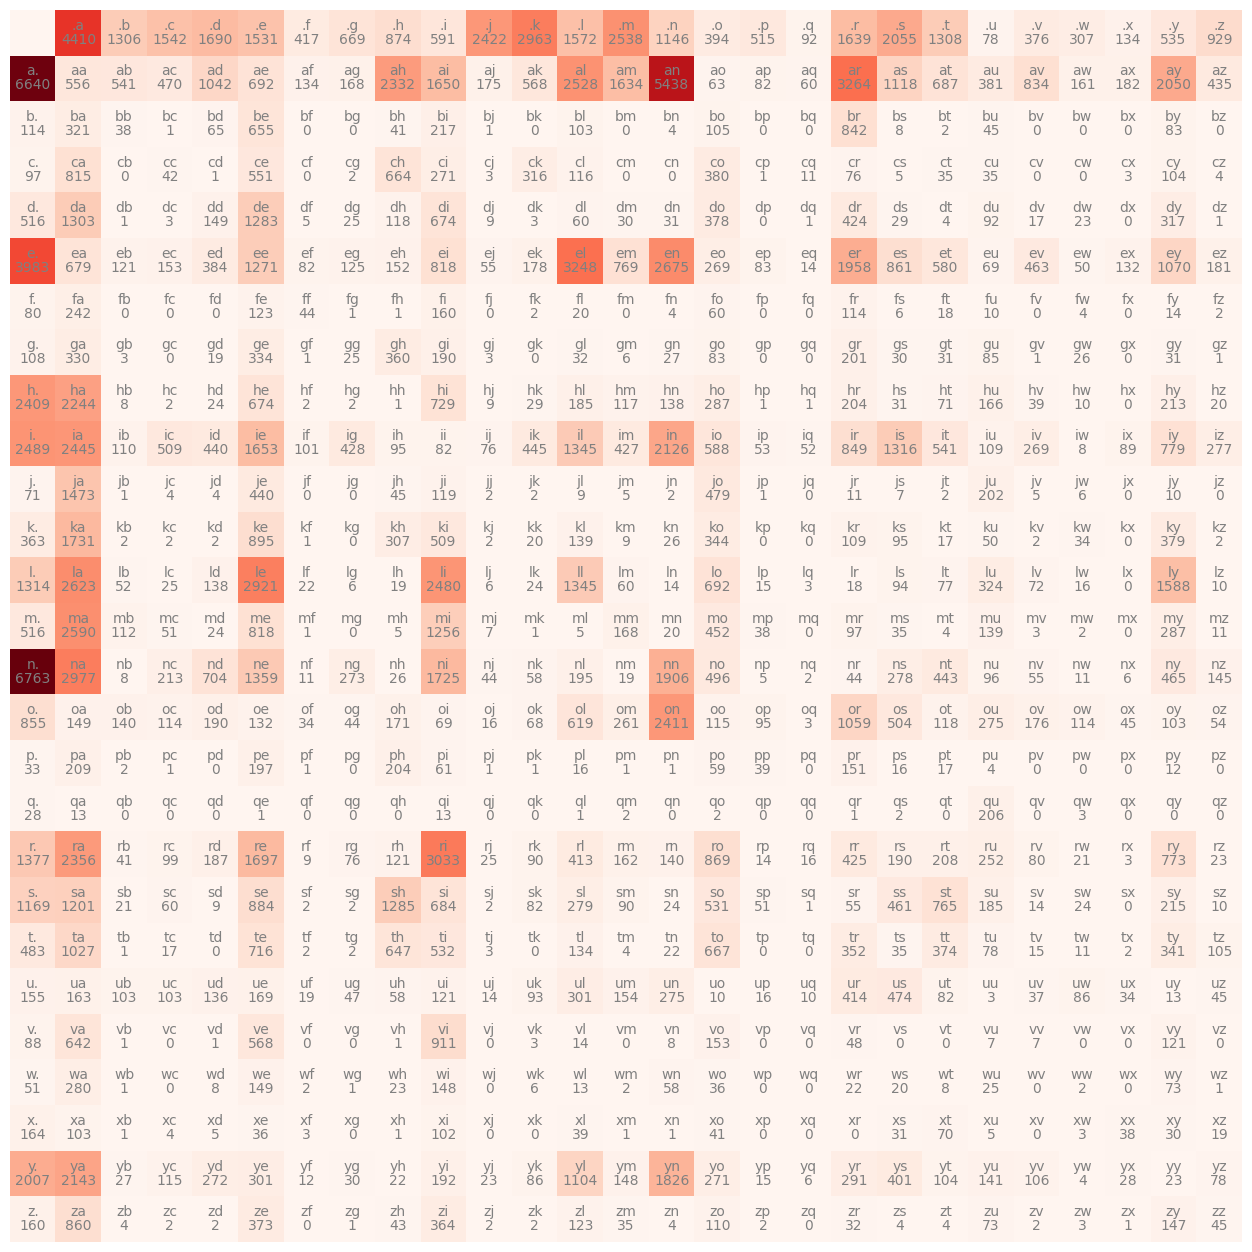

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Reds')
for i in range(27):
    for j in range(27):
        # skip drawing [start,end] cell
        if (i == j == 0):
            continue
            
        chstr = itos[i] + itos[j]
        style_props = {"ha":"center",  "color":"gray"}
        plt.text(j, i, chstr, **style_props, va="bottom")
        plt.text(j, i, N[i, j].item(), **style_props, va="top")
plt.axis('off')

In [28]:
P = N.float()

# normalize each each element in each row with respect to
# all other elements in the same row
# e.g. X = [
#            [1,2,3],
#            [1,1,1],
#          ]
# dimension = 1 <-- columns
# X = X / X.sum(dimenstion, keepdim=True)
# X
# [
#    [6],
#    [3],
# ]

P = P / P.sum(1, keepdim=True)

In [29]:
def get_next_index(current_index):
    p = P[current_index]
    ix = torch.multinomial(p, num_samples=1, replacement=True).item()
    return ix

In [30]:
for _ in range(20):
    index = 0
    name = ''
    names = []
    while True:
        index = get_next_index(index)
        # print(index)
        name += itos[index]
        if index == 0:
            names.extend(name)
            break

    print(''.join(names))

kykerovohism.
mari.
monn.
mchon.
keri.
jonemoxicl.
llon.
p.
phava.
vemeyayman.
marallleyn.
sh.
feetelerzae.
ava.
je.
cetil.
anamon.
zizivian.
kadimarury.
brendeyryandenaf.


In [31]:
log_likelihood = 0.0
n = 0
for w in words:
# for w in ['mm']:
    characters = [special] + list(w) + [special]
    for ch1, ch2 in zip(characters, characters[1:]):
        # numerical representation of character
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]

        prob = P[ix1, ix2]
        logprob = torch.log(prob)
        log_likelihood += logprob
        n += 1

nll = -log_likelihood
print(f'{nll/n}')

2.454129457473755


In [ ]:
# lets create a training set of bigrams (x, y)
xs, ys = [], []

for w in words:
    chs = [special] + list(w) + [special]
    for ch1, ch2 in zip(chs, chs[1:]):
        ix1 = stoi[ch1]
        ix2 = stoi[ch2]
        print(ch1,ch2)
        xs.append(ix1)
        ys.append(ix2)

xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()

In [33]:
import torch.nn.functional as F

In [34]:
# initialize 27 neurons' weights, each of them receives 27 inputs
W = torch.randn((27, 27), requires_grad=True)

In [125]:
# forward pass vvvv
for k in range(200):
    # convert each of the examples from bigrams to one-hot representation
    xenc = F.one_hot(xs, num_classes=27).float()
    # predict log-counts
    logits  = xenc @ W
    # counts, equivalent to what we have in N
    counts = logits.exp()
    # probabilities for next character
    probs = counts / counts.sum(1, keepdims=True)
    
    loss = -probs[torch.arange(num), ys].log().mean()

In [126]:
print(loss.item())

2.5564868450164795


In [127]:
# backward pass
W.grad = None 
loss.backward()

In [128]:
W.data += -80 * W.grad

In [162]:
for _ in range(20):
    index = 0
    name = ''
    names = []
    while True:
        xenc = F.one_hot(torch.tensor([index]), num_classes=27).float()
        logits = xenc @ W
        counts = logits.exp()
        p = counts / counts.sum(1, keepdims=True)


        index = torch.multinomial(p, num_samples=1, replacement=True).item()

        name += itos[index]
        if index == 0:
            names.extend(name)
            break

    print(''.join(names))

jyvetcasqssmaxn.
bgjah.
uoprmwounnileochutl.
m.
elysahaio.
brjchkannahashe.
dtmxbenaialonxcjon.
haivinakahistre.
lima.
ratayasi.
jcee.
siqdfcishiavelalyn.
gvidzaley.
ze.
qata.
jahaygwqqey.
mchr.
zllavi.
juse.
wjorin.
